__Goal:__ is to estimate the future Petrol Price. To do this, please follow the following steps

### Import the libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

2023-04-21 23:10:16.550693: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-21 23:10:16.591437: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-21 23:10:16.592344: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 23:10:17.306029: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fuel= pd.read_excel('Weekly Fuel Prices.xlsx')

__Q1)__ Look at the information about the data? Prepare your data for exploring more as time series?-10 points

In [3]:
fuel.head()

,Date,Petrol (USD),Diesel (USD)
0,2003-06-09 00:00:00,74.590284,76.773394
1,2003-06-16 00:00:00,74.469143,76.689054
2,2003-06-23 00:00:00,74.423566,76.620546
3,2003-06-30 00:00:00,74.352421,76.505260
4,2003-07-07 00:00:00,74.283737,76.457376


In [4]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          882 non-null    object 
 1   Petrol (USD)  881 non-null    float64
 2   Diesel (USD)  881 non-null    float64
dtypes: float64(2), object(1)
memory usage: 20.8+ KB


In [5]:
fuel.shape

(883, 3)

In [6]:
fuel['Petrol (USD)'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
878    False
879    False
880    False
881     True
882     True
Name: Petrol (USD), Length: 883, dtype: bool

In [7]:
fuel['Diesel (USD)'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
878    False
879    False
880    False
881     True
882     True
Name: Diesel (USD), Length: 883, dtype: bool

In [8]:
fuel.isnull().sum()

Date            1
Petrol (USD)    2
Diesel (USD)    2
dtype: int64

In [9]:
fuel=fuel.set_index('Date')

In [10]:
fuel

,Petrol (USD),Diesel (USD)
Date,,
2003-06-09 00:00:00,74.590284,76.773394
2003-06-16 00:00:00,74.469143,76.689054
2003-06-23 00:00:00,74.423566,76.620546
2003-06-30 00:00:00,74.352421,76.505260
2003-07-07 00:00:00,74.283737,76.457376
...,...,...
2020-04-06 00:00:00,110.234797,116.833354
2020-04-13 00:00:00,109.265819,116.150812
2020-04-20 00:00:00,108.632747,115.732573


In [11]:
fuel_data=fuel.dropna(how='any')

In [12]:
fuel_data.isna().sum()

Petrol (USD)    0
Diesel (USD)    0
dtype: int64

__Q2__ Compare the shape of your prepared dataframe? - 5 points

In [13]:
fuel_data.shape

(881, 2)

In [14]:
fuel_data.head()

,Petrol (USD),Diesel (USD)
Date,,
2003-06-09 00:00:00,74.590284,76.773394
2003-06-16 00:00:00,74.469143,76.689054
2003-06-23 00:00:00,74.423566,76.620546
2003-06-30 00:00:00,74.352421,76.505260
2003-07-07 00:00:00,74.283737,76.457376


In [15]:
fuel.shape

(883, 2)

__Q3__ Plot the columns of the dataframe with respect to the 'Date' -10 points

Text(0, 0.5, 'USD')

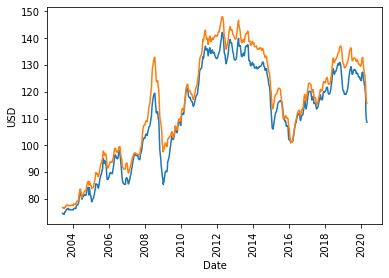

In [16]:

plt.plot(fuel_data[['Petrol (USD)','Diesel (USD)']])
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('USD')

__Q4__ Decompose your data taking into account your purpose!: --5 points

* The correct choice of model (take period=7) --10 points

In [17]:
y_decompose=seasonal_decompose(fuel_data['Diesel (USD)'], model='additive', period=7)

In [18]:
x_decompose=seasonal_decompose(fuel_data['Petrol (USD)'], model='additive', period=7)

__Q5__ Plot the seasonal component of the decomposed model? --5 points

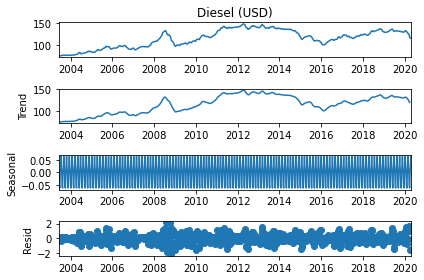

In [19]:
y_decompose_plot=y_decompose.plot()

<AxesSubplot:xlabel='Date'>

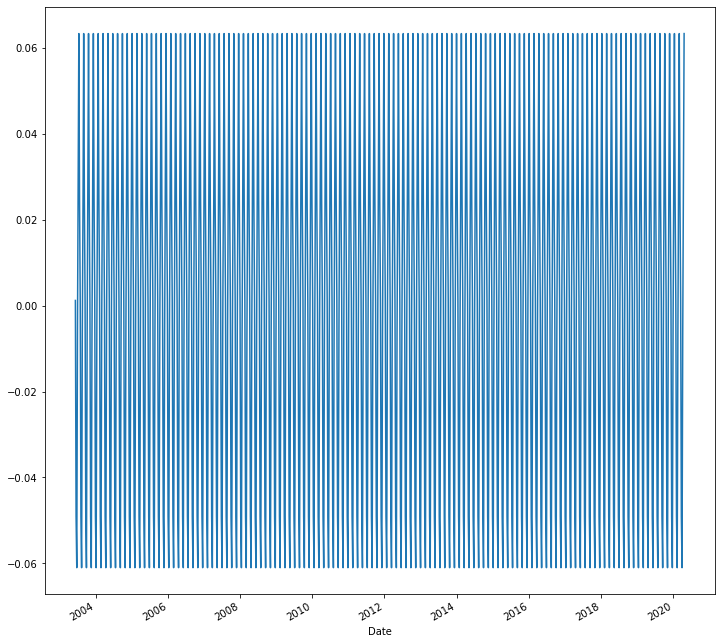

In [20]:
plt.figure(figsize=(12,12))
y_decompose.seasonal.plot()

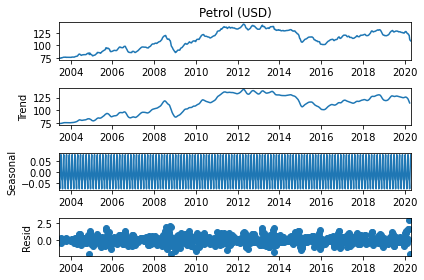

In [21]:
x_decompose_plot=x_decompose.plot()

<AxesSubplot:xlabel='Date'>

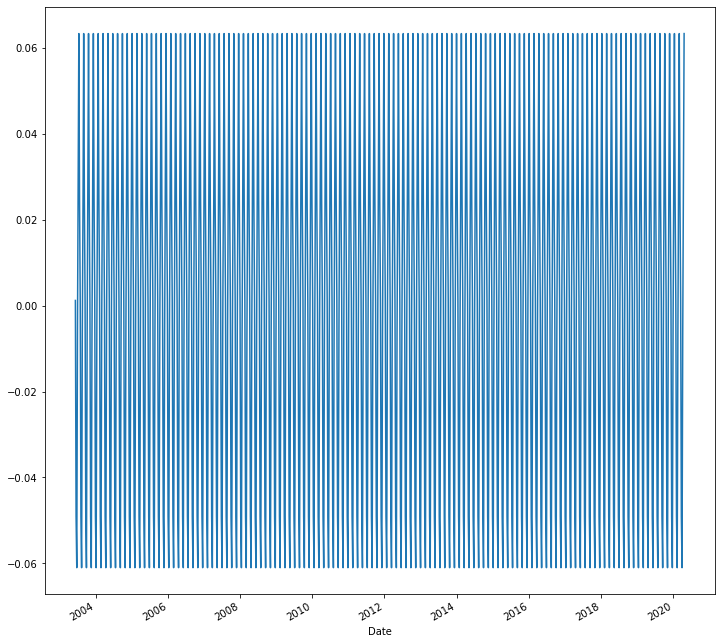

In [22]:
plt.figure(figsize=(12,12))
y_decompose.seasonal.plot()

/tmp/ipykernel_29867/1399775421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_data['Moving Average']=fuel_data['Diesel (USD)'].rolling(window=7).mean().shift(1)


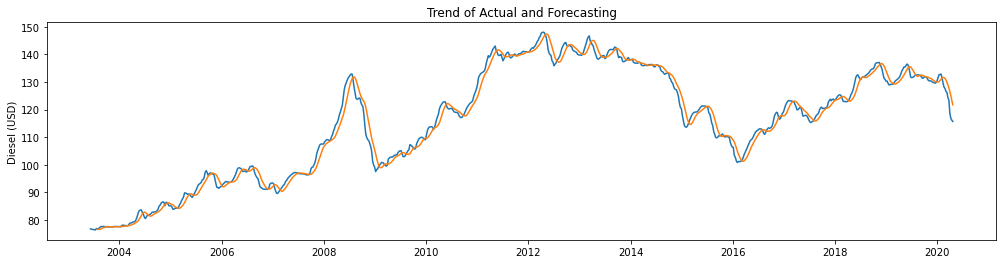

In [23]:
fuel_data['Moving Average']=fuel_data['Diesel (USD)'].rolling(window=7).mean().shift(1)
plt.figure(figsize=(17,4))
plt.ylabel("Diesel (USD)")
plt.title('Trend of Actual and Forecasting')
plt.plot(fuel_data[('Diesel (USD)')])
plt.plot(fuel_data[('Moving Average')])


/tmp/ipykernel_29867/450576644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_data['Moving Average_P']=fuel_data['Petrol (USD)'].rolling(window=7).mean().shift(1)


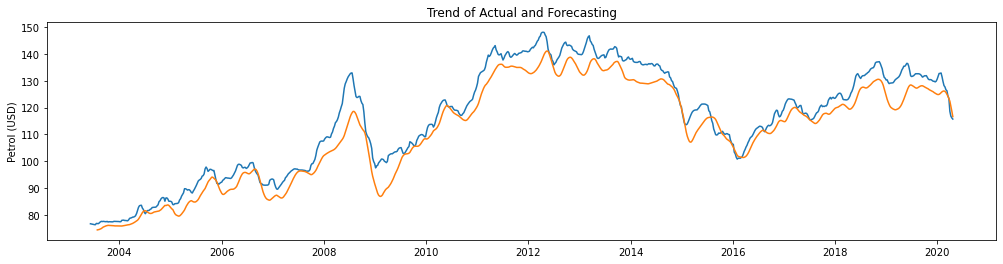

In [24]:
fuel_data['Moving Average_P']=fuel_data['Petrol (USD)'].rolling(window=7).mean().shift(1)
plt.figure(figsize=(17,4))
plt.ylabel("Petrol (USD)")
plt.title('Trend of Actual and Forecasting')
plt.plot(fuel_data[('Diesel (USD)')])
plt.plot(fuel_data[('Moving Average_P')])


/tmp/ipykernel_29867/2474877281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_data['Standard Deviation']=fuel_data['Diesel (USD)'].rolling(window=7).std().shift(1)


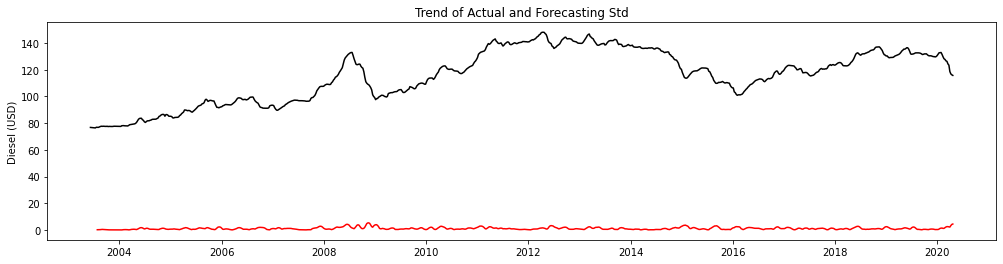

In [25]:
fuel_data['Standard Deviation']=fuel_data['Diesel (USD)'].rolling(window=7).std().shift(1)
plt.figure(figsize=(17,4))
plt.ylabel("Diesel (USD)")
plt.title('Trend of Actual and Forecasting Std')
plt.plot(fuel_data[('Diesel (USD)')], color='black')
plt.plot(fuel_data[('Standard Deviation')],color='red')

/tmp/ipykernel_29867/776475121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_data['Standard Deviation']=fuel_data['Petrol (USD)'].rolling(window=7).std().shift(1)


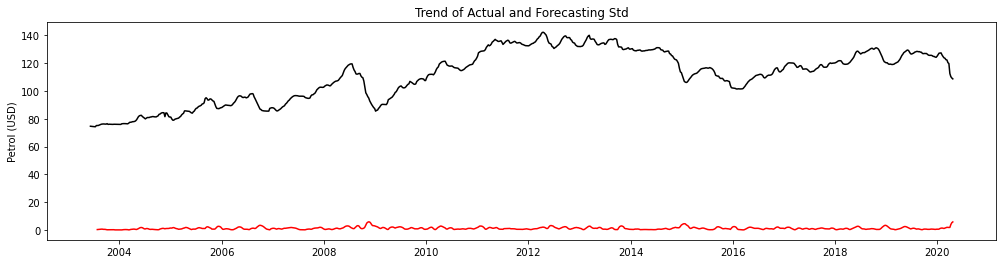

In [26]:
fuel_data['Standard Deviation']=fuel_data['Petrol (USD)'].rolling(window=7).std().shift(1)
plt.figure(figsize=(17,4))
plt.ylabel("Petrol (USD)")
plt.title('Trend of Actual and Forecasting Std')
plt.plot(fuel_data[('Petrol (USD)')], color='black')
plt.plot(fuel_data[('Standard Deviation')], color='red')

__Interpretation:__  15 points(each 5)

1) What do you think about trendness of the data?    

   Ans:The data seem have a trend in both petrol and diesel because average changes over time
   
2) What do you think about seasonality of the data? 

   Ans: The data in both petrol and diesel is not seasonal since there no cyclic and variance constant.
   
3) What about stationarity of the data? 

    Ans: non-stationary because mean changes over time.

__Q6__ Plot Autocorrelation of the considered data! --5 points

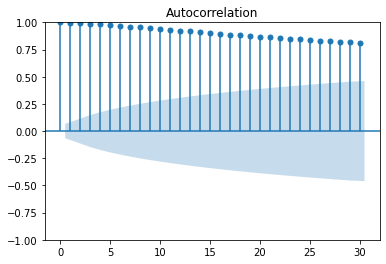

In [27]:
acf_plot_petrol=plot_acf(fuel_data['Petrol (USD)'])
#autocorrelation coefficients decrease as the lags incerases which indicates the data is not stationary. 

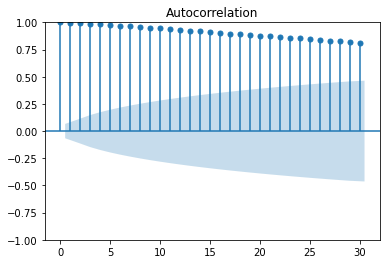

In [28]:
acf_plot_diesel=plot_acf(fuel_data['Diesel (USD)'])
#autocorrelation coefficients decrease as the lags incerases which indicates the data is not stationary. 

__Interpretation:__  Interpret the obtained figure. What can you say about the data?  (5 points)


#The data is not stationary.

__Q7__ Use the histograms to see the noise of the data? (5 points)

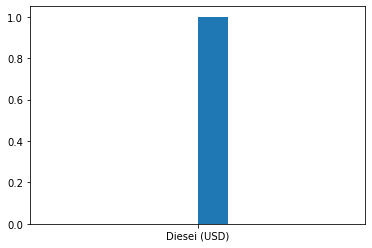

In [52]:
plt.hist('Diesei (USD)')
plt.show()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

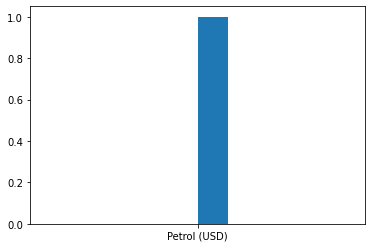

In [30]:
plt.hist('Petrol (USD)')


__Interpretation:__ Is it Noisy? Is it White Noise?  (10 points)

Ans: 

Not a noisy data because it is not bell shaped.White noise time series is defined by a zero mean, constant variance, and zero correlation. This is not true foe this data

__Q8__ To be more sure apply Augmented Dickey-Fuller test for the data? (5 points)

In [31]:
from statsmodels.tsa.stattools import adfuller
ADF_result_petrol=adfuller(fuel_data['Petrol (USD)'])
print(f'ADF Statistic: {ADF_result_petrol[0]}')
print(f'p-value: {ADF_result_petrol[1]}')
print(f'number of lags: {ADF_result_petrol[2]}')


ADF Statistic: -2.261375973454385
p-value: 0.184727626574974
number of lags: 4


In [32]:
ADF_result_diesel=adfuller(fuel_data['Diesel (USD)'])
print(f'ADF Statistic: {ADF_result_diesel[0]}')
print(f'p-value: {ADF_result_diesel[1]}')
print(f'number of lags: {ADF_result_diesel[2]}')


ADF Statistic: -2.1587049758347994
p-value: 0.22157292570951698
number of lags: 4


__Interpretation:__ discuss the result, please! (10 points)

since p-value is above 0.05 the data is non-stationary. We also see 4 lags.

***

### EXTRA POINTS -30 points 

__HELP__ Utilize the [difference strategy!](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/) if you need (for anybody who says the data is non-stationary) Otherwise, go the the model step! (10 points)

In [33]:
#The data is non-stationary according to the definition:
#Stationary data refers to the time series data that mean and variance do not vary across time. 
#The data is considered non-stationary if there is a strong trend or seasonality observed from the data.
diff_fuel_data_petrol=np.diff(fuel_data['Petrol (USD)'], n=2)

In [34]:
# Be sure the new data set is fully stationary: 
print(f'Dickey-Fuller Test: {diff_fuel_data_petrol}')
print(f'ADF Statistic: {diff_fuel_data_petrol[0]}')
print(f'p-value: {diff_fuel_data_petrol[1]}')
print(f'number of lags: {diff_fuel_data_petrol[2]}')


Dickey-Fuller Test: [ 7.55640000e-02 -2.55680000e-02  2.46100000e-03 -8.47600000e-03
  9.35823000e-01 -8.23048000e-01 -1.20860000e-02  2.96603000e-01
  4.43000000e-02 -1.20369000e-01 -1.71214000e-01  2.74810000e-02
 -1.30095000e-01 -1.79510000e-02 -1.70030000e-02  4.13662000e-01
 -8.84348000e-01  6.85937000e-01 -2.03132000e-01  5.33990000e-02
 -5.42280000e-02  3.74420000e-02  1.04242000e-01 -1.08077000e-01
 -4.88800000e-03  1.32070000e-02 -2.49240000e-02  5.34900000e-02
 -7.99870000e-02  8.43650000e-02  4.41274000e-01 -3.83167000e-01
 -3.55240000e-02 -2.70080000e-02 -7.80260000e-02  1.54900000e-03
  2.60500000e-03  4.65733000e-01  2.46526000e-01 -6.03827000e-01
  9.89920000e-02  1.14338000e-01 -2.36304000e-01  1.31107000e-01
  1.91551000e-01  5.29056000e-01  1.40047000e-01  1.77284000e-01
 -5.65700000e-01 -4.02630000e-01 -1.42950000e-01 -9.85287000e-01
  3.99304000e-01 -1.34403000e-01  9.92330000e-02  9.97376000e-01
  3.76540000e-02 -4.68757000e-01 -4.38090000e-02  3.39656000e-01
 -2.5

Text(0, 0.5, 'USD')

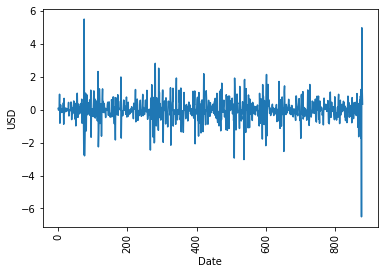

In [35]:

plt.plot(diff_fuel_data_petrol)
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('USD')

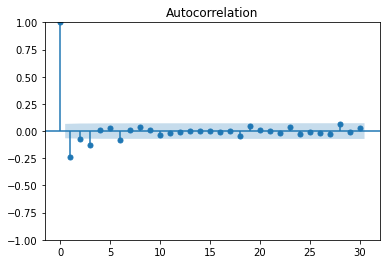

In [36]:
after_difference=plot_acf(diff_fuel_data_petrol)  

In [37]:
diff_fuel_data_petrol_2=np.diff(fuel_data['Petrol (USD)'], n=2)

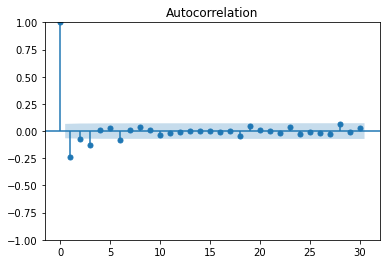

In [38]:
after_difference=plot_acf(diff_fuel_data_petrol_2) 


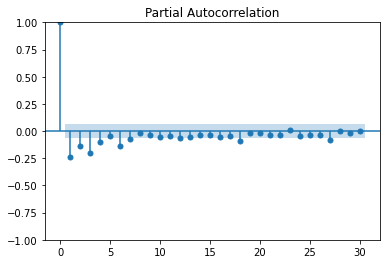

In [39]:
after_difference2=plot_pacf(diff_fuel_data_petrol_2) #the pacf is significant after lag 1,we should use ARIMA

__Q9__ Use the arima model to predict the the price of petrol? (20 points)

Hint: You can use [Strategy in Github](https://github.com/Manishms18/Air-Passengers-Time-Series-Analysis/blob/master/Air_Passenger_with_explanations.ipynb)

In [40]:

from pmdarima import auto_arima

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
stepwise_fit=auto_arima(fuel_data['Petrol (USD)'], trace=True, 
                        suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1770.093, Time=1.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2211.375, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1768.135, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1915.068, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2211.204, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1766.920, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1768.903, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1768.105, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1766.917, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1768.892, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1804.135, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1765.243, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1914.232, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1766.518, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  881
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -879.622
Date:                Fri, 21 Apr 2023   AIC                           1765.243
Time:                        23:10:41   BIC                           1779.583
Sample:                             0   HQIC                          1770.727
                                - 881                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6891      0.033     20.861      0.000       0.624       0.754
ma.L1         -0.0974      0.041     -2.388      0.017      -0.177      -0.017
sigma2         0.4320      0.008     55.267      0.000       0.417       0.447
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10441.53
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -1.53
Prob(H) (two-sided):                  0.62   Kurtosis:                        19.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Optional: forecast the following year estimation!

In [43]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
print(fuel_data.shape)
train=fuel_data[:850]
test=fuel_data[850:]
print(train.shape, test.shape)

(881, 5)
(850, 5) (31, 5)


In [45]:
#Train the model
model=ARIMA(train['Petrol (USD)'], order=(1,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Petrol (USD)   No. Observations:                  850
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -790.687
Date:                Fri, 21 Apr 2023   AIC                           1587.373
Time:                        23:10:42   BIC                           1601.605
Sample:                             0   HQIC                          1592.825
                                - 850                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6687      0.032     21.032      0.000       0.606       0.731
ma.L1         -0.0223      0.037     -0.596      0.551      -0.095       0.051
sigma2         0.3768      0.009     41.800      0.000       0.359       0.395
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1814.26
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
#Make predicitons on test set
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end, type='levels')
pred.index=fuel_data.index[start:end+1]
print(pred)

Date
2019-09-23    126.353878
2019-09-30    125.976492
2019-10-07    125.724134
2019-10-14    125.555381
2019-10-21    125.442537
2019-10-28    125.367077
2019-11-04    125.316618
2019-11-11    125.282875
2019-11-18    125.260312
2019-11-25    125.245223
2019-12-02    125.235134
2019-12-09    125.228387
2019-12-16    125.223875
2019-12-23    125.220858
2019-12-30    125.218841
2020-01-06    125.217492
2020-01-13    125.216590
2020-01-20    125.215986
2020-01-27    125.215583
2020-02-03    125.215313
2020-02-10    125.215133
2020-02-17    125.215012
2020-02-24    125.214932
2020-03-02    125.214878
2020-03-09    125.214842
2020-03-16    125.214818
2020-03-23    125.214801
2020-03-30    125.214791
2020-04-06    125.214783
2020-04-13    125.214779
2020-04-20    125.214775
Name: predicted_mean, dtype: float64


TypeError: index type not supported

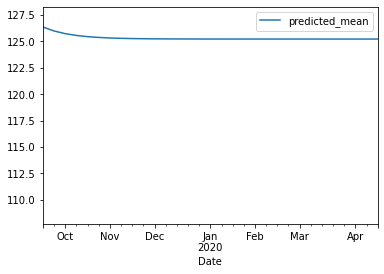

In [47]:
pred.plot(legend=True)
test['Petrol (USD)'].plot(legend=True)


In [ ]:
from sklearn.metrics import mean_squared_error
from math import  sqrt
rmse=sqrt(mean_squared_error(pred,test['Petrol (USD)']))
print(rmse)

In [ ]:
model2=ARIMA(fuel_data['Petrol (USD)'], order=(1,1,1))
model2=model2.fit()
fuel_data.tail()

In [ ]:
index_future_dates=pd.date_range(start='2020-04-20 00:00:00', end='2021-04-20 00:00:00')
pred=model2.predict(start=len(fuel_data), end=len(fuel_data)+365, type='levels').rename('Following Year Prediction')
pred.index=index_future_dates

In [ ]:
pred.plot(figsize=(12,5),legend=True)